In [3]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt



In [4]:
X = np.random.randint(10, 45, (25,2))
Y = np.random.randint(55, 70, (25, 2))
Z = np.vstack((X,Y))

Z = np.float32(Z)

print (X)
print(Y)



[[19 15]
 [30 17]
 [25 20]
 [26 39]
 [28 33]
 [15 22]
 [16 11]
 [39 17]
 [32 41]
 [10 15]
 [28 15]
 [10 14]
 [38 17]
 [21 44]
 [17 25]
 [13 29]
 [28 11]
 [25 31]
 [26 28]
 [34 12]
 [33 26]
 [44 22]
 [32 43]
 [17 37]
 [15 24]]
[[57 56]
 [62 56]
 [61 61]
 [66 57]
 [66 66]
 [61 58]
 [64 58]
 [69 69]
 [55 59]
 [69 64]
 [66 67]
 [65 61]
 [68 68]
 [64 57]
 [60 57]
 [68 64]
 [65 59]
 [59 63]
 [60 55]
 [68 60]
 [63 61]
 [67 68]
 [57 56]
 [60 64]
 [55 69]]


In [5]:
print(Z)

[[19. 15.]
 [30. 17.]
 [25. 20.]
 [26. 39.]
 [28. 33.]
 [15. 22.]
 [16. 11.]
 [39. 17.]
 [32. 41.]
 [10. 15.]
 [28. 15.]
 [10. 14.]
 [38. 17.]
 [21. 44.]
 [17. 25.]
 [13. 29.]
 [28. 11.]
 [25. 31.]
 [26. 28.]
 [34. 12.]
 [33. 26.]
 [44. 22.]
 [32. 43.]
 [17. 37.]
 [15. 24.]
 [57. 56.]
 [62. 56.]
 [61. 61.]
 [66. 57.]
 [66. 66.]
 [61. 58.]
 [64. 58.]
 [69. 69.]
 [55. 59.]
 [69. 64.]
 [66. 67.]
 [65. 61.]
 [68. 68.]
 [64. 57.]
 [60. 57.]
 [68. 64.]
 [65. 59.]
 [59. 63.]
 [60. 55.]
 [68. 60.]
 [63. 61.]
 [67. 68.]
 [57. 56.]
 [60. 64.]
 [55. 69.]]


In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

ret, label, center = cv2.kmeans(Z, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [8]:
A = Z[label.ravel() == 0]
B = Z[label.ravel() == 1]

print(A)

print(B)

[[19. 15.]
 [30. 17.]
 [25. 20.]
 [26. 39.]
 [28. 33.]
 [15. 22.]
 [16. 11.]
 [39. 17.]
 [32. 41.]
 [10. 15.]
 [28. 15.]
 [10. 14.]
 [38. 17.]
 [21. 44.]
 [17. 25.]
 [13. 29.]
 [28. 11.]
 [25. 31.]
 [26. 28.]
 [34. 12.]
 [33. 26.]
 [44. 22.]
 [32. 43.]
 [17. 37.]
 [15. 24.]]
[[57. 56.]
 [62. 56.]
 [61. 61.]
 [66. 57.]
 [66. 66.]
 [61. 58.]
 [64. 58.]
 [69. 69.]
 [55. 59.]
 [69. 64.]
 [66. 67.]
 [65. 61.]
 [68. 68.]
 [64. 57.]
 [60. 57.]
 [68. 64.]
 [65. 59.]
 [59. 63.]
 [60. 55.]
 [68. 60.]
 [63. 61.]
 [67. 68.]
 [57. 56.]
 [60. 64.]
 [55. 69.]]


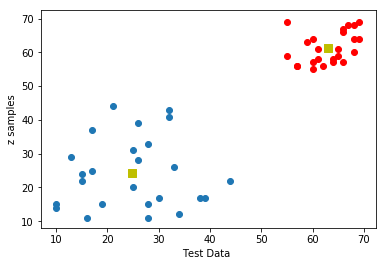

In [11]:
plt.scatter(A[:,0], A[:, 1])

plt.scatter(B[:,0], B[:, 1], c = 'r')



plt.scatter(center[:, 0], center[:, 1], s= 80, c = 'y', marker = 's')
plt.xlabel('Test Data '),plt.ylabel('z samples')
plt.show()

In [12]:
# example without cv2 apis

from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt



In [13]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])

X = np.array(list(zip(x1,x2))).reshape(len(x1),2)



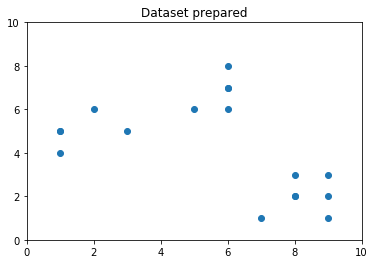

In [14]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0, 10])

plt.title("Dataset prepared")
plt.scatter(x1, x2)

plt.show()

In [16]:
from sklearn.cluster import KMeans

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)


for k in K :
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]
    
    mapping2[k] = kmeanModel.inertia_

    
    
for key, val in mapping1.items() :
    print(str(key) + ": " + str(val))
    

1: 3.4577032384495707
2: 1.7687413573405673
3: 0.8819889697423957
4: 0.7867963662217718
5: 0.6635212812400347
6: 0.5920126825722444
7: 0.5346344802455644
8: 0.41652236641410356
9: 0.35294117647058826


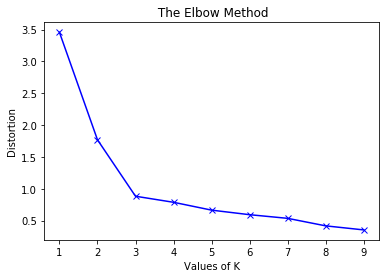

In [17]:
plt.plot(K, distortions, 'bx-')
plt.xlabel("Values of K" )
plt.ylabel('Distortion')
plt.title(" The Elbow Method")
plt.show()